In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
cv2.__version__
#Anna Meleshko 319346045

'4.1.2'

In [0]:
class Image(object):
  def __init__(self,path):
    self.path = path
    self.bgr_img = None
    self.gray_img = None
    self.rgb_img = None
  def read_image(self,return_img =False):
   self.bgr_img = cv2.imread(self.path)
   if return_img:
     return self.bgr_img
  def rgb(self,return_img = False):
    self.rgb_img = cv2.cvtColor(self.bgr_img,cv2.COLOR_BGR2RGB)
    if return_img:
      return self.rgb_img
  def gray(self,return_img =False):
    self.gray_img = cv2.cvtColor(self.bgr_img,cv2.COLOR_BGR2GRAY)
    if return_img:
      return self.gray_img
  def Show(self,img,title = 'image'):
    print("c")
  def show_all(self,image_list,title_list):
    plt.figure(figsize =[20,10])
    assert len(image_list) ==len(title_list),"Houston we've got a problem"
    N = len(image_list)
    for index,(img,title) in enumerate(zip(image_list,title_list)):
      plt.subplot(1,N,index + 1)
      if len(img.shape) != 3:
        plt.imshow(img,cmap ='gray')
      else:
        plt.imshow(img)
      plt.title(title)
    plt.show()

--2020-04-02 13:12:17--  https://www.fcbarcelonanoticias.com/uploads/s1/11/88/56/4/messi-250-goles-camp-nou_4_641x361.jpeg
Resolving www.fcbarcelonanoticias.com (www.fcbarcelonanoticias.com)... 104.26.15.228, 104.26.14.228, 2606:4700:20::681a:ee4, ...
Connecting to www.fcbarcelonanoticias.com (www.fcbarcelonanoticias.com)|104.26.15.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘input.jpg’

input.jpg               [ <=>                ]  34.87K  --.-KB/s    in 0.007s  

2020-04-02 13:12:17 (4.58 MB/s) - ‘input.jpg’ saved [35704]



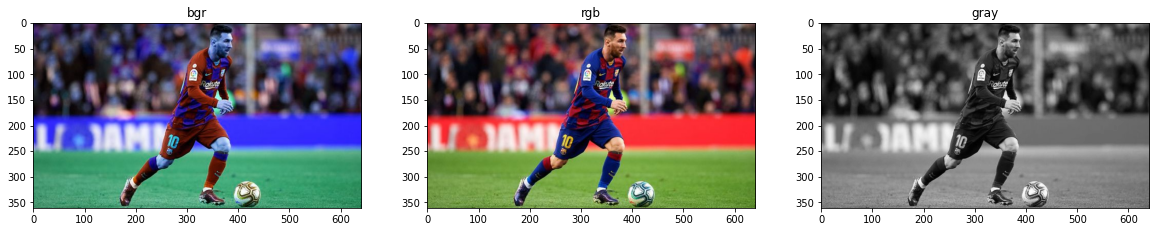

In [57]:
!wget https://www.fcbarcelonanoticias.com/uploads/s1/11/88/56/4/messi-250-goles-camp-nou_4_641x361.jpeg -O input.jpg
image = Image('input.jpg')
bgr = image.read_image(return_img = True)
rgb = image.rgb(return_img = True)
gray = image.gray(return_img = True)
image.show_all([bgr,rgb,gray],["bgr","rgb","gray"])

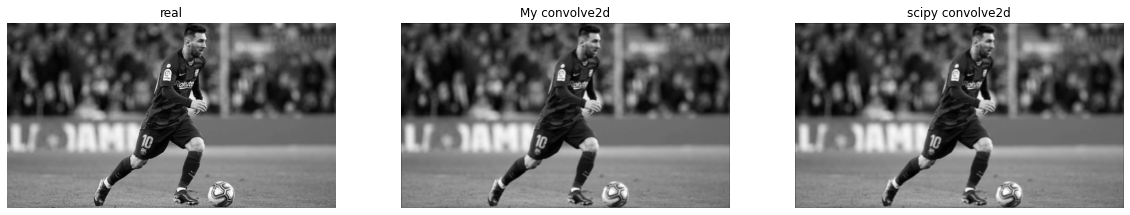

In [58]:
def convolve2d(image, kernel):
    krows,kcols = kernel.shape
    imrows,imcols = image.shape[0],image.shape[1]
    kernel_ver_flip = np.flip(kernel,axis=0) # flip an array vertically
    kernel = np.flip(kernel_ver_flip,axis=1) # flip an array horizontally
    psize = [int(krows/2),int(kcols/2)] 
    image_wrapped_zeros = np.zeros((imrows + psize[0]*2, imcols + psize[1]*2)) #make matrix of zeros to wrap a matrix inside 
    image_wrapped_zeros[psize[0]:-psize[0], psize[1]:-psize[1]] = image #"wrap" the matrix with zeros
    convolved_img = np.zeros_like(image) # for new matrix
    for x in range(imcols):   
        for y in range(imrows):
            temp_img = image_wrapped_zeros[y:y + krows, x:x + kcols]
            convolved_img[y,x]=np.sum(temp_img*kernel)        
    return convolved_img

kernel = np.array([[1,2,3],[4,5,6],[7,8,9]])/4
image_equalized = gray/np.max(np.abs(gray))
image_kernel = convolve2d(image_equalized,kernel)
plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(image_equalized,cmap=plt.cm.gray)
plt.title('real')
plt.axis('off')
plt.subplot(132)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('My convolve2d')
plt.axis('off')
import scipy.signal
image_kernel = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title("scipy convolve2d")
plt.axis('off')
plt.show()

#1.Edge detection with sobel operator

--2020-04-02 13:12:40--  https://www.essentiallysports.com/wp-content/uploads/IMG_20191230_233458.jpg
Resolving www.essentiallysports.com (www.essentiallysports.com)... 99.86.32.24, 99.86.32.113, 99.86.32.44, ...
Connecting to www.essentiallysports.com (www.essentiallysports.com)|99.86.32.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79432 (78K) [image/jpeg]
Saving to: ‘input1.jpg’

input1.jpg          100%[===================>]  77.57K  --.-KB/s    in 0.1s    

2020-04-02 13:12:41 (550 KB/s) - ‘input1.jpg’ saved [79432/79432]



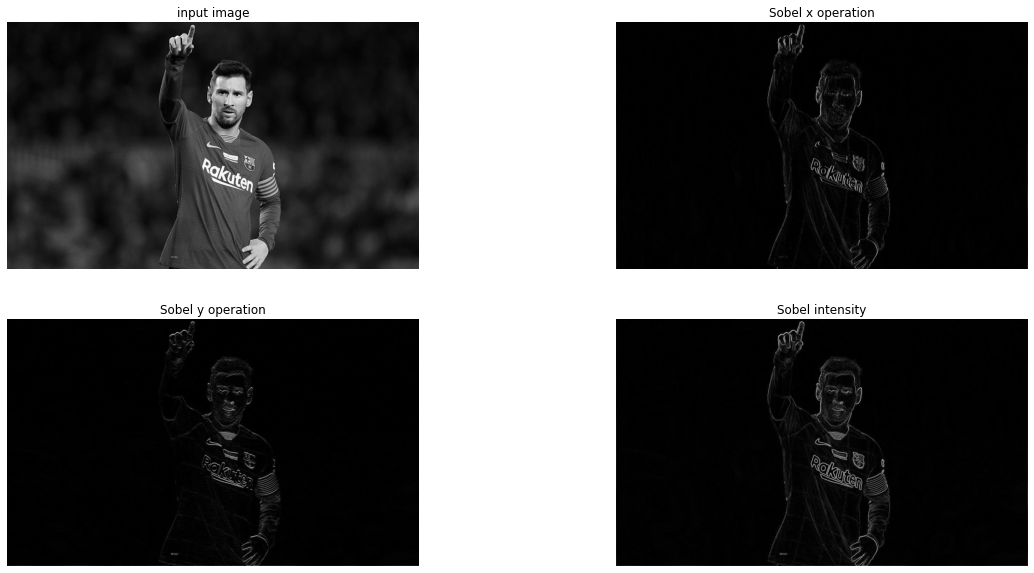

In [59]:
!wget https://www.essentiallysports.com/wp-content/uploads/IMG_20191230_233458.jpg -O input1.jpg
image =cv2.imread('input1.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

def sobel (image, dx, dy, kernelx, kernely,calc_orientaion = False):
  if dx == 1:
    image_x = scipy.signal.convolve2d(image, kernelx, 'same')
    grad_magn = np.sqrt(np.square(image_x))
    grad_magn *= 255.0 / grad_magn.max()
  if dy == 1:
    image_y = scipy.signal.convolve2d(image, kernely, 'same')
    grad_magn = np.sqrt(np.square(image_y))
    grad_magn *= 255.0 / grad_magn.max()
  if dy == 1 and dx == 1:
    image_x = scipy.signal.convolve2d(image, kernelx, 'same')
    image_y = scipy.signal.convolve2d(image, kernely, 'same')
    grad_magn = np.sqrt(np.square(image_x) + np.square(image_y))
    grad_magn *= 255.0 / grad_magn.max()
  return grad_magn 

kernelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
image_equalized = gray/np.max(np.abs(gray))
sobelx = sobel(gray, 1, 0, kernelx,None)
sobely = sobel(gray, 0, 1, None, kernely)
sobelxy = sobel(gray,1,1, kernelx,kernely)

plt.figure(figsize=[20,10])
plt.subplot(221)
plt.imshow(gray,cmap=plt.cm.gray)
plt.title('input image')
plt.axis('off')
plt.subplot(222)
plt.imshow(sobelx, cmap=plt.cm.gray)
plt.title('Sobel x operation')
plt.axis('off')
plt.subplot(223)
plt.imshow(sobely, cmap=plt.cm.gray)
plt.title("Sobel y operation")
plt.axis('off')
plt.subplot(224)
plt.imshow(sobelxy, cmap=plt.cm.gray)
plt.title("Sobel intensity")
plt.axis('off')
plt.show()


#2.Canny Edge Detection

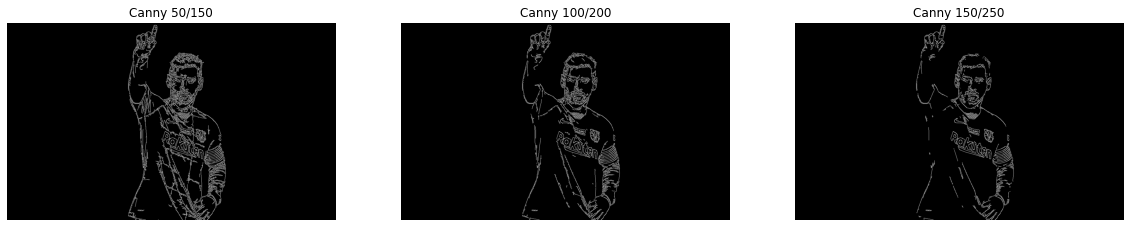

In [60]:
edges1 = cv2.Canny(gray,50,150)
edges2 = cv2.Canny(gray,100,200)
edges3 = cv2.Canny(gray,150,250)

plt.figure(figsize=[20,10])
plt.subplot(131)
plt.imshow(edges1,cmap=plt.cm.gray)
plt.title('Canny 50/150')
plt.axis('off')
plt.subplot(132)
plt.imshow(edges2, cmap=plt.cm.gray)
plt.title('Canny 100/200')
plt.axis('off')
plt.subplot(133)
plt.imshow(edges3, cmap=plt.cm.gray)
plt.title("Canny 150/250")
plt.axis('off')
plt.show()

  

#Canny operator-explenation
The Threshold role in the Canny function is to take the edges and define each edge as weak(dark) or strong(bright).
when we usу canny operator, we provide min value of threshold and max value of threshold.
it will go through all the pixels in the image, and for each pixel it will check if it's higher than the high value, if so it will set it to 255(white),and those are the edges that we see.if the pixle value is between low and high we set them to the lowest value of threshold, and otherwise to 0.
now we can understand,than bigger the trheshold, lower the chance that the pixle value will be higher than the threshold, and thats why we will see less white edges.



--2020-04-02 13:12:57--  https://www.1life.co.uk/app/uploads/sites/34/2018/06/Willesden-outdoor-running-track-08-1184x764.jpg
Resolving www.1life.co.uk (www.1life.co.uk)... 160.153.142.18
Connecting to www.1life.co.uk (www.1life.co.uk)|160.153.142.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 523034 (511K) [image/jpeg]
Saving to: ‘track.jpg’

track.jpg           100%[===================>] 510.78K   366KB/s    in 1.4s    

2020-04-02 13:12:59 (366 KB/s) - ‘track.jpg’ saved [523034/523034]



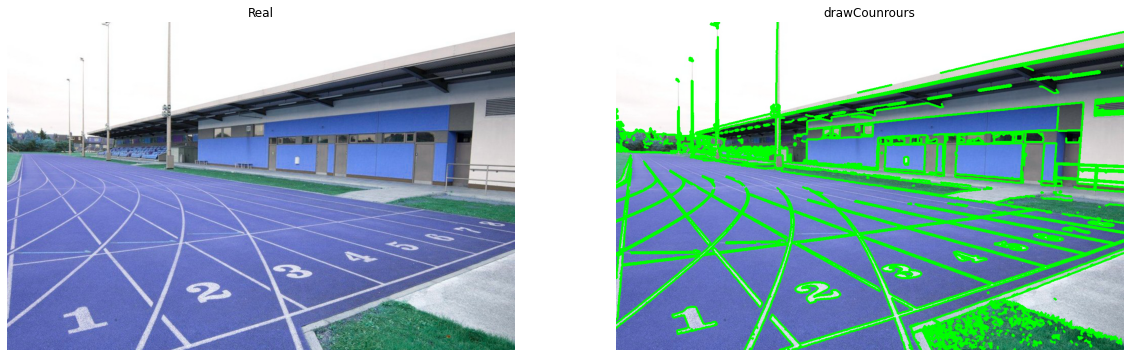

In [61]:
!wget https://www.1life.co.uk/app/uploads/sites/34/2018/06/Willesden-outdoor-running-track-08-1184x764.jpg -O track.jpg
track=cv2.imread('track.jpg')
track_img = track.copy()
edges = cv2.Canny(track,150,250)
contour,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
draw = cv2.drawContours(track_img,contour,-1,(0,255,0),3)

plt.figure(figsize=[20,10])
plt.subplot(121)
plt.imshow(track)
plt.title('Real')
plt.axis('off')
plt.subplot(122)
plt.imshow(draw)
plt.title('drawCounrours')
plt.axis('off')
plt.show()